# Plotting speed of sound

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle
from scipy.interpolate import interp1d

from utils import clean_outliers_and_mask, evenly_spaced_data

labels = ['vdw', 'IST', 'ISCT', 'ISCT2']

data_folder = '../cs_sq_fulldata'
plot_dir = 'plots/second_batch_with_antibar'

In [2]:
def get_df():
    # reading main data file
    filepath = f'cs_sq_fulldata_{particle_type}_b_{b}_{label}_g_{g}_R_{R}_mu_{mu}_.csv'
    df = pd.read_csv(os.path.join(data_folder, filepath))

    # checking if exists extra data for same file (with obvious prefix)
    # if yes then concat it to main df
    prefixes = ['extradata', 'lowTdata', 'onlyT_2_data']
    for prefix in prefixes:
        extradata_filepath = f'cs_sq_{prefix}_{particle_type}_b_{b}_{label}_g_{g}_R_{R}_mu_{mu}_.csv'
        extradata_fullpath = os.path.join(data_folder, extradata_filepath)
        if os.path.isfile(extradata_fullpath):
            extra_df = pd.read_csv(extradata_fullpath)
            df = df.append(extra_df)

    df = df.dropna(subset=['sp_of_snd_sq'])
    df = df.sort_values('T')
    return df

def get_plot_folder(folder_label):
    if not selected_only:
        plot_folder = os.path.join(plot_dir, folder_label)
    else:
        plot_folder = os.path.join(plot_dir, selected_plots_dir)
    return plot_folder

def get_savepath():
    return os.path.join(plot_folder, plot_file)

def make_axis_labels(ticks=True):
    if ticks:
        plt.xticks(np.arange(0,3001,300))
    plt.xlabel('$T$, MeV')
    plt.ylabel('$C_S$')

def plotting(main_linestyle, curve_label=None, s=30, splining=True, kind='quadratic', **kwargs):
    df = get_df()
    if cleaning: 
        df = clean_outliers_and_mask(df)
    xdata = df['T']
    ydata = np.sqrt(df['sp_of_snd_sq'])
    if splining:
        f = interp1d(xdata, ydata, kind=kind)
        xdata = np.linspace(xdata.min(), xdata.max(), 500)
        ydata = f(xdata)

    plt.plot( xdata, ydata, linestyle=main_linestyle)
    plt.scatter(*evenly_spaced_data(xdata, ydata, **kwargs), marker=next(markers), label=curve_label, s=s)

In [3]:
saving = False
cleaning = True

selected_only = True
selected_plots_dir = 'selected'

# baryons

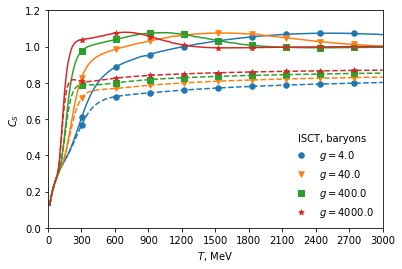

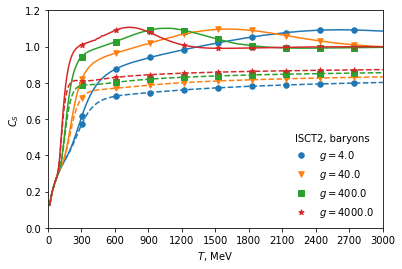

In [4]:
# plots for different g
g_array = [4., 40.,400.,4000.]

markers = cycle(['o', 'v', 's', '*'])

particle_type = 'baryons'
mu = 0.
R = 0.39

selected_eos = ['ISCT', 'ISCT2']

for label in labels:

    # plotting only selected eos
    if selected_only:
        if label not in selected_eos:
            continue

    b = 1.
    for g in g_array:
        plotting('-', curve_label=f'$g={g}$')
    
    plt.gca().set_prop_cycle(None)
    
    b = 0.
    for g in g_array:
        plotting('--')
    
    plt.xlim(0, 3e3)
    plt.ylim(0, 1.2)

    make_axis_labels()

    plt.legend(frameon=False, title=f'{label}, {particle_type}')

    plot_folder = get_plot_folder('diff_g')
    plot_file = f'cs_of_T_{particle_type}_{label}_R_{R}_mu_{mu}_.pdf'
    savepath = get_savepath()
    if saving:
        plt.savefig(savepath)

    plt.show()

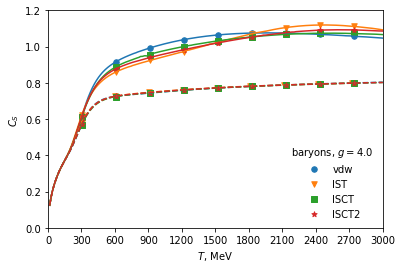

In [6]:
# plots for different eos
g_array = [4., 40.,400.,4000.]

markers = cycle(['o', 'v', 's', '*'])

particle_type = 'baryons'
mu = 0.
R = 0.39

selected_g = [4.]

for g in g_array:

    # plotting only selected g values
    if selected_only:
        if g not in selected_g:
            continue

    b = 1.
    for label in labels:
        plotting('-', curve_label=label)

    plt.gca().set_prop_cycle(None)
    
    b = 0.
    for label in labels:
        plotting('--')
        
    
    plt.xlim(0, 3e3)
    plt.ylim(0, 1.2)
    
    make_axis_labels()

    plt.legend(frameon=False, title=f'{particle_type}, $g={g}$')

    plot_folder = get_plot_folder('diff_eos')
    plot_file = f'cs_of_T_{particle_type}_g_{g}_R_{R}_mu_{mu}_.pdf'
    savepath = get_savepath()
    if saving:
        plt.savefig(savepath)

    plt.show()

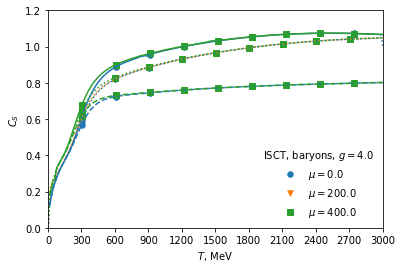

In [10]:
# plots for different mu
g_array = [4., 4000.]

particle_type = 'baryons'
mu_array = [0., 200., 400.]
R = 0.39

markers = cycle(['o', 'v', 's'])

selected_g = [4.]
selected_eos = ['ISCT']

for g in g_array:
    for label in labels:

        # plotting only selected g and eos
        if selected_only:
            if g not in selected_g or label not in selected_eos:
                continue

        b = 1.
        for mu in mu_array:
            plotting('-', curve_label=f'$\\mu={mu}$' )
        
        plt.gca().set_prop_cycle(None)
        
        b = 0.5
        for mu in mu_array:
            plotting(':')

        plt.gca().set_prop_cycle(None)
        
        b = 0.
        for mu in mu_array:
            plotting('--')
            
        
        plt.xlim(0, 3e3)
        plt.ylim(0, 1.2)

        make_axis_labels()

        plt.legend(frameon=False, title=f'{label}, {particle_type}, $g={g}$')

        plot_folder = get_plot_folder('diff_mu')
        plot_file = f'cs_of_T_{particle_type}_{label}_g_{g}_R_{R}_.pdf'
        savepath = get_savepath()
        if saving:
            plt.savefig(savepath)

        plt.show()

# pions

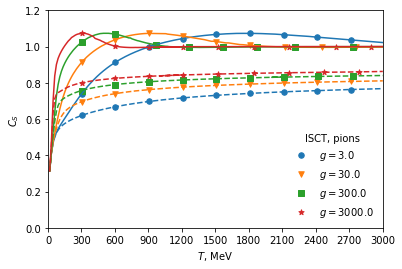

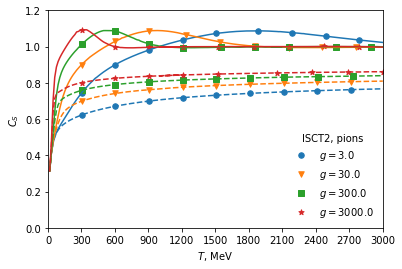

In [7]:
# plots for different g
g_array = [3., 30.,300.,3000.]

markers = cycle(['o', 'v', 's', '*'])

particle_type = 'pions'
mu = 0.
R = 0.39

selected_eos = ['ISCT', 'ISCT2']

for label in labels:

    # plotting only selected eos
    if selected_only:
        if label not in selected_eos:
            continue

    b = 1.
    for g in g_array:
        plotting('-', curve_label=f'$g={g}$')
    
    plt.gca().set_prop_cycle(None)
    
    b = 0.
    for g in g_array:
        plotting('--')
    
    plt.xlim(0, 3e3)
    plt.ylim(0, 1.2)

    make_axis_labels()

    plt.legend(frameon=False, title=f'{label}, {particle_type}')

    plot_folder = get_plot_folder('diff_g')
    plot_file = f'cs_of_T_{particle_type}_{label}_R_{R}_.pdf'
    savepath = get_savepath()
    if saving:
        plt.savefig(savepath)

    plt.show()

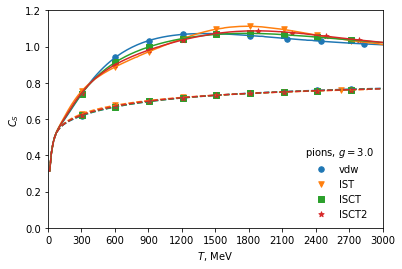

In [8]:
# plots for different eos
g_array = [3., 30.,300.,3000.]

markers = cycle(['o', 'v', 's', '*'])

particle_type = 'pions'
mu = 0.
R = 0.39

selected_g = [3.]

for g in g_array:

    # plotting only selected g values
    if selected_only:
        if g not in selected_g:
            continue

    b = 1.
    for label in labels:
        plotting('-', curve_label=label)

    plt.gca().set_prop_cycle(None)
    
    b = 0.
    for label in labels:
        plotting('--')
    
    plt.xlim(0, 3e3)
    plt.ylim(0, 1.2)

    make_axis_labels()

    plt.legend(frameon=False, title=f'{particle_type}, $g={g}$')

    plot_folder = get_plot_folder('diff_eos')
    plot_file = f'cs_of_T_{particle_type}_g_{g}_R_{R}_.pdf'
    savepath = get_savepath()
    if saving:
        plt.savefig(savepath)

    plt.show()

# light mesons

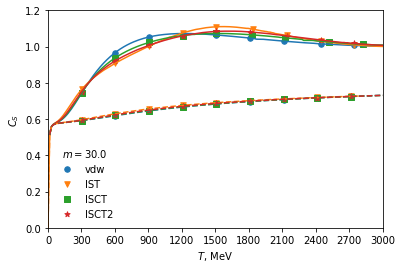

In [9]:
# plots for different masses and different eos
m_array = [20., 25., 30.]
mu = 0.
g = 3.
R = 0.4

markers = cycle(['o', 'v', 's', '*'])

selected_m = [30.]

for m in m_array:
    particle_type = f'ligth_mes_m_{m}'

    # plotting only selected mass values
    if selected_only:
        if m not in selected_m:
            continue

    b = 1.
    for label in labels:
        plotting('-', curve_label=label)
    
    plt.gca().set_prop_cycle(None)
    
    b = 0.
    for label in labels:
        plotting('--')
    
    
    # plt.hlines(1, -100, 3e3 )

    plt.xlim(0, 3e3)
    plt.ylim(0,1.2)
    
    make_axis_labels()

    plt.legend(frameon=False, title=f'$m = {m}$')

    plot_folder = get_plot_folder('diff_eos')
    plot_file = f'cs_of_T_{particle_type}_R_{R}_.pdf'
    savepath = get_savepath()
    if saving:
        plt.savefig(savepath)

    plt.show()

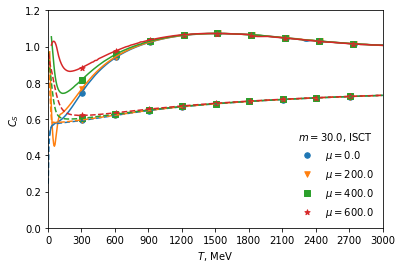

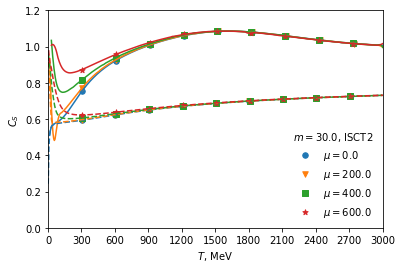

In [46]:
# plots for different chemical potentials mu and different eos
m_array = [20., 25., 30.]
g = 3.
R = 0.4

mu_array = [0., 200., 400., 600.]

markers = cycle(['o', 'v', 's', '*'])

selected_eos = ['ISCT', 'ISCT2']
selected_m = [30.]

for m in m_array:
    for label in labels:
        particle_type = f'ligth_mes_m_{m}'

        # plotting only selected mass values
        if selected_only:
            if m not in selected_m or label not in selected_eos:
                continue

        b = 1.
        for mu in mu_array:
            plotting('-', curve_label=f'$\\mu={mu}$')
        
        plt.gca().set_prop_cycle(None)
        
        b = 0.
        for mu in mu_array:
            plotting('--')
        
        
        # plt.hlines(1, -100, 3e3 )

        plt.xlim(0, 3e3)
        plt.ylim(0,1.2)
        
        make_axis_labels()

        plt.legend(frameon=False, title=f'$m = {m}$, {label}')

        plot_folder = get_plot_folder('diff_mu')
        plot_file = f'cs_of_T_{particle_type}_{label}_R_{R}_.pdf'
        savepath = get_savepath()
        if saving:
            plt.savefig(savepath)

        plt.show()

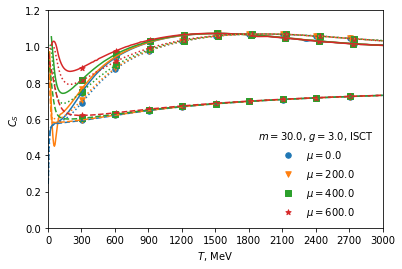

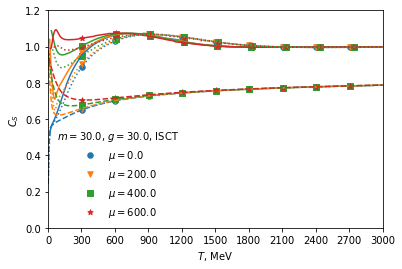

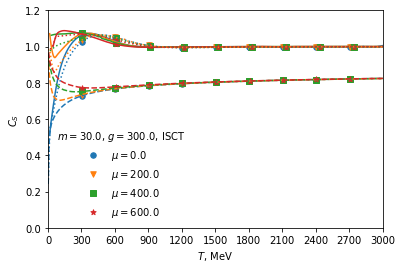

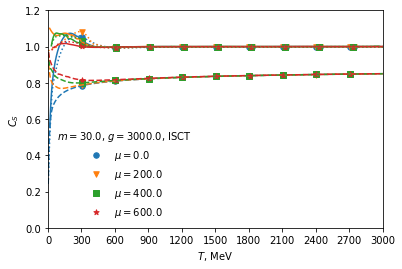

In [19]:
# plots for different chemical potentials mu with fixed degeneracy factors g
m_array = [30.]
g_array = [3., 30., 300., 3000.]
R = 0.4

mu_array = [0., 200., 400., 600.]

markers = cycle(['o', 'v', 's', '*'])

selected_eos = ['ISCT']
selected_m = [30.]
selected_g = [3., 30., 300., 3000.]

for m in m_array:
    for label in labels:
        for g in g_array:
            particle_type = f'ligth_mes_m_{m}'

            # plotting only selected mass values
            if selected_only:
                if m not in selected_m or label not in selected_eos:
                    continue
            
            b = 1.
            for mu in mu_array:
                plotting('-', curve_label=f'$\\mu={mu}$')
            
            plt.gca().set_prop_cycle(None)
            
            b = 0.5
            for mu in mu_array:
                plotting(':')

            plt.gca().set_prop_cycle(None)
            
            b = 0.
            for mu in mu_array:
                plotting('--')
            
            
            # plt.hlines(1, -100, 3e3 )

            plt.xlim(0., 3e3)
            plt.ylim(0, 1.2)
            
            make_axis_labels()

            plt.legend(frameon=False, title=f'$m = {m}$, $g={g}$, {label}')

            plot_folder = get_plot_folder('diff_mu')
            plot_file = f'cs_of_T_{particle_type}_{label}_R_{R}_g_{g}_diff_mu_.pdf'
            savepath = get_savepath()
            if saving:
                plt.savefig(savepath)

            plt.show()

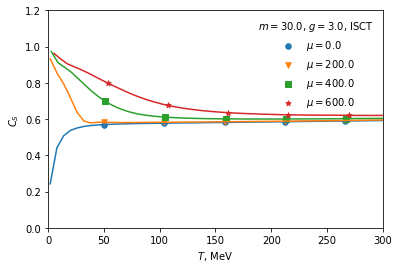

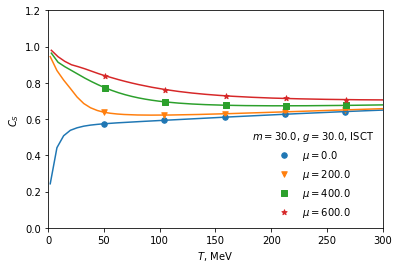

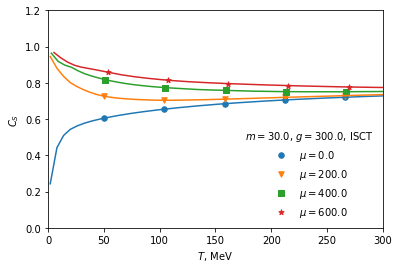

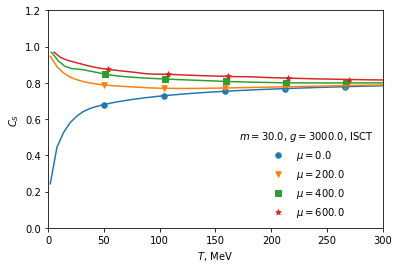

In [6]:
# plots for different chemical potentials mu with fixed degeneracy factors g
# for low range of T and only b = 0 value relativization parameter
m_array = [30.]
g_array = [3., 30., 300., 3000.]
R = 0.4

mu_array = [0., 200., 400., 600.]

markers = cycle(['o', 'v', 's', '*'])

selected_eos = ['ISCT']
selected_m = [30.]
selected_g = [3., 30., 300., 3000.]

for m in m_array:
    for label in labels:
        for g in g_array:
            particle_type = f'ligth_mes_m_{m}'

            # plotting only selected mass values
            if selected_only:
                if m not in selected_m or label not in selected_eos:
                    continue
            
            b = 0.
            for mu in mu_array:
                plotting('-', curve_label=f'$\\mu={mu}$', interval=50)

            plt.xlim(0., 300.)
            plt.ylim(0, 1.2)
            
            make_axis_labels(False)

            plt.legend(frameon=False, title=f'$m = {m}$, $g={g}$, {label}')

            plot_folder = get_plot_folder('diff_mu')
            plot_file = f'cs_of_low_T_{particle_type}_{label}_b_{b}_R_{R}_g_{g}_diff_mu_.pdf'
            savepath = get_savepath()
            if saving:
                plt.savefig(savepath)

            plt.show()

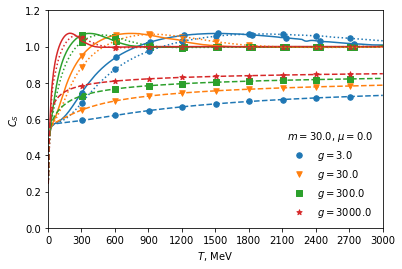

In [14]:
# plots for different degeneracy factor g
m_array = [20., 25., 30.]
g_array = [3., 30., 300., 3000.]
R = 0.4
mu = 0.

markers = cycle(['o', 'v', 's', '*'])

selected_eos = ['ISCT']
selected_m = [30.]

for m in m_array:
    for label in labels:
        particle_type = f'ligth_mes_m_{m}'

        # plotting only selected mass values
        if selected_only:
            if m not in selected_m or label not in selected_eos:
                continue

        b = 1.
        for g in g_array:
            plotting('-', curve_label=f'$g={g}$')

        plt.gca().set_prop_cycle(None)
        
        b = 0.5
        for g in g_array:
            plotting(':')
        
        plt.gca().set_prop_cycle(None)
        
        b = 0.
        for g in g_array:
            plotting('--')
        
        
        # plt.hlines(1, -100, 3e3 )

        plt.xlim(0, 3e3)
        plt.ylim(0,1.2)
        
        make_axis_labels()

        plt.legend(frameon=False, title=f'$m = {m}$, $\\mu = {mu}$')

        plot_folder = get_plot_folder('diff_g')
        plot_file = f'cs_of_T_{particle_type}_{label}_R_{R}_mu_{mu}_.pdf'
        savepath = get_savepath()
        if saving:
            plt.savefig(savepath)

        plt.show()

# Plotting 4-component mixture

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

import os, sys
sys.path.insert(1, os.path.abspath('..')) 
from main import hbar

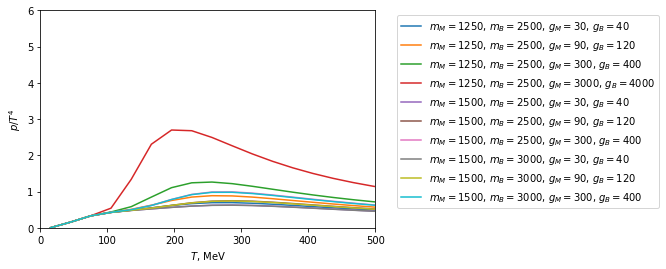

In [7]:
# first batch
# g_M_array = [3., 30., 300., 3000.]
# g_B_array = [4., 40., 400., 4000.]
# m_M_array = [1000.]
# m_B_array = [1500.]

# all available
# g_M_array = [3., 30., 90., 300., 3000.]
# g_B_array = [4., 40., 120., 400., 4000.]
# m_M_array = [1000., 1250., 1500., 1500.]
# m_B_array = [1500., 2500., 2500., 3000.]

# second batch
m_M_array = [1250., 1500., 1500.]
m_B_array = [2500., 2500., 3000.]
# g_M_array = [30., 90., 300.]
# g_B_array = [40., 120., 400.]
g_M_array = [30., 90., 300., 3000.]
g_B_array = [40., 120., 400., 4000.]

mu = 0.

for m_M, m_B in zip(m_M_array, m_B_array):
    for g_M, g_B in zip(g_M_array, g_B_array):
        
        folder = '../cs_sq_fulldata/'
        fname = f'rootdata_mixture_g_M_{g_M}_g_B_{g_B}_m_M_{m_M}_m_B_{m_B}_mu_{mu}_.csv'
        if fname in os.listdir(folder):
            fpath = os.path.join(folder, fname)

            df = pd.read_csv(fpath)
            df['p/T^4'] = df['p']/df['T']**4*hbar**3

            # xdata = df['T']
            # ydata = df['p/T^4']
            # f = interp1d(xdata, ydata, kind='cubic')
            # xdata = np.linspace(xdata.min(), xdata.max(), 500)
            # ydata = f(xdata)

            # plt.plot(xdata, ydata, label=f'$g_M={g_M:.0f}$, $g_B={g_B:.0f}$')
            plt.plot(df['T'], df['p/T^4'], label=f'$m_M={m_M:.0f}$, $m_B={m_B:.0f}$, $g_M={g_M:.0f}$, $g_B={g_B:.0f}$')

plt.xlabel('$T$, MeV')
plt.ylabel('$p/T^4$')

plt.xlim(0, 500)
plt.ylim(0, 6)
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.savefig('4comp_mixture_pT^4_mu_0.0_.pdf')
plt.show()

In [5]:
# m_M_array = [1250.]
# m_B_array = [2500.]
# g_M_array = [3000.]
# g_B_array = [4000.]
# mu = 0.

for m_M, m_B in zip(m_M_array, m_B_array):
    for g_M, g_B in zip(g_M_array, g_B_array):
        
        folder = '../cs_sq_fulldata/'
        fname = f'rootdata_mixture_g_M_{g_M}_g_B_{g_B}_m_M_{m_M}_m_B_{m_B}_mu_{mu}_.csv'
        if fname in os.listdir(folder):
            fpath = os.path.join(folder, fname)

            df = pd.read_csv(fpath)
            df['p/T^4'] = df['p']/df['T']**4*hbar**3
            df = df[['T', 'p',  'Sigma', 'K', 'p/T^4']]
            df.to_csv(fpath.replace('csv', 'txt'), sep=' ', index=False)